In [22]:
from file import load
from datetime import date
from collections import Counter
import matplotlib.pyplot as plt


In [23]:
symbol = 'NVDA'
data = load(symbol)
details = data['ticker_details']
print(details.ticker_root, details.name)
xweeks = []
prev_week = []
for w in data['options_weekly']:
  day = w['day']
  exp_weeks = [round((date.fromisoformat(p['contract'].expiration_date) - day.date).days / 7) for p in w['options']]
  new_weeks = sorted(list(set(exp_weeks) - set(w-1 for w in prev_week)))
  print(day.date, *[f'{x:3d}' for x in exp_weeks])
  if new_weeks:
    print('       new', *[f'{x:3d}' for x in new_weeks])
  xweeks += exp_weeks
  prev_week = exp_weeks

NVDA Nvidia Corp
2022-06-17   0   1   2   3   4   5   6   9  13  18  22  26  31  39  52  65  83 105
       new   0   1   2   3   4   5   6   9  13  18  22  26  31  39  52  65  83 105
2022-06-24   0   1   2   3   4   5   6   8  12  17  21  25  30  38  51  64  82 104
       new   6
2022-07-01   0   1   2   3   4   5   6   7  11  16  20  24  29  37  50  63  81 103
       new   6
2022-07-08   0   1   2   3   4   5   6   7  10  15  19  23  28  36  49  62  80 102
       new   7
2022-07-15   0   1   2   3   4   5   6   9  14  18  22  27  35  48  61  79 101
2022-07-22   0   1   2   3   4   5   6   8  13  17  21  26  34  47  60  78 100
       new   6
2022-07-29   0   1   2   3   4   5   6   7  12  16  20  25  29  33  46  59  77  99
       new   6  29
2022-08-05   0   1   2   3   4   5   6   7  11  15  19  24  28  32  45  58  76  98
       new   7
2022-08-12   0   1   2   3   4   5   6   7  10  14  18  23  27  31  44  57  75  97
       new   7
2022-08-19   0   1   2   3   4   5   6   9  13  17  

In [24]:
total_weeks = len(data['options_weekly'])
print('total weeks:', total_weeks)
counter = Counter(xweeks)
print('weeks count frequency')
for w, c in sorted(counter.items()):
    print(f'{w:5d} {c:5d} {total_weeks/c:9.1f}')

total weeks: 104
weeks count frequency
    0   103       1.0
    1   103       1.0
    2   103       1.0
    3   103       1.0
    4   103       1.0
    5   102       1.0
    6   101       1.0
    7    60       1.7
    8    24       4.3
    9    24       4.3
   10    24       4.3
   11    24       4.3
   12    24       4.3
   13    24       4.3
   14    23       4.5
   15    24       4.3
   16    23       4.5
   17    23       4.5
   18    23       4.5
   19    22       4.7
   20    22       4.7
   21    22       4.7
   22    22       4.7
   23    22       4.7
   24    22       4.7
   25    21       5.0
   26    21       5.0
   27    20       5.2
   28    21       5.0
   29    21       5.0
   30    19       5.5
   31    18       5.8
   32    16       6.5
   33    16       6.5
   34    12       8.7
   35    10      10.4
   36    10      10.4
   37    11       9.5
   38    11       9.5
   39    11       9.5
   40    10      10.4
   41    11       9.5
   42    11       9.5
   43    11    

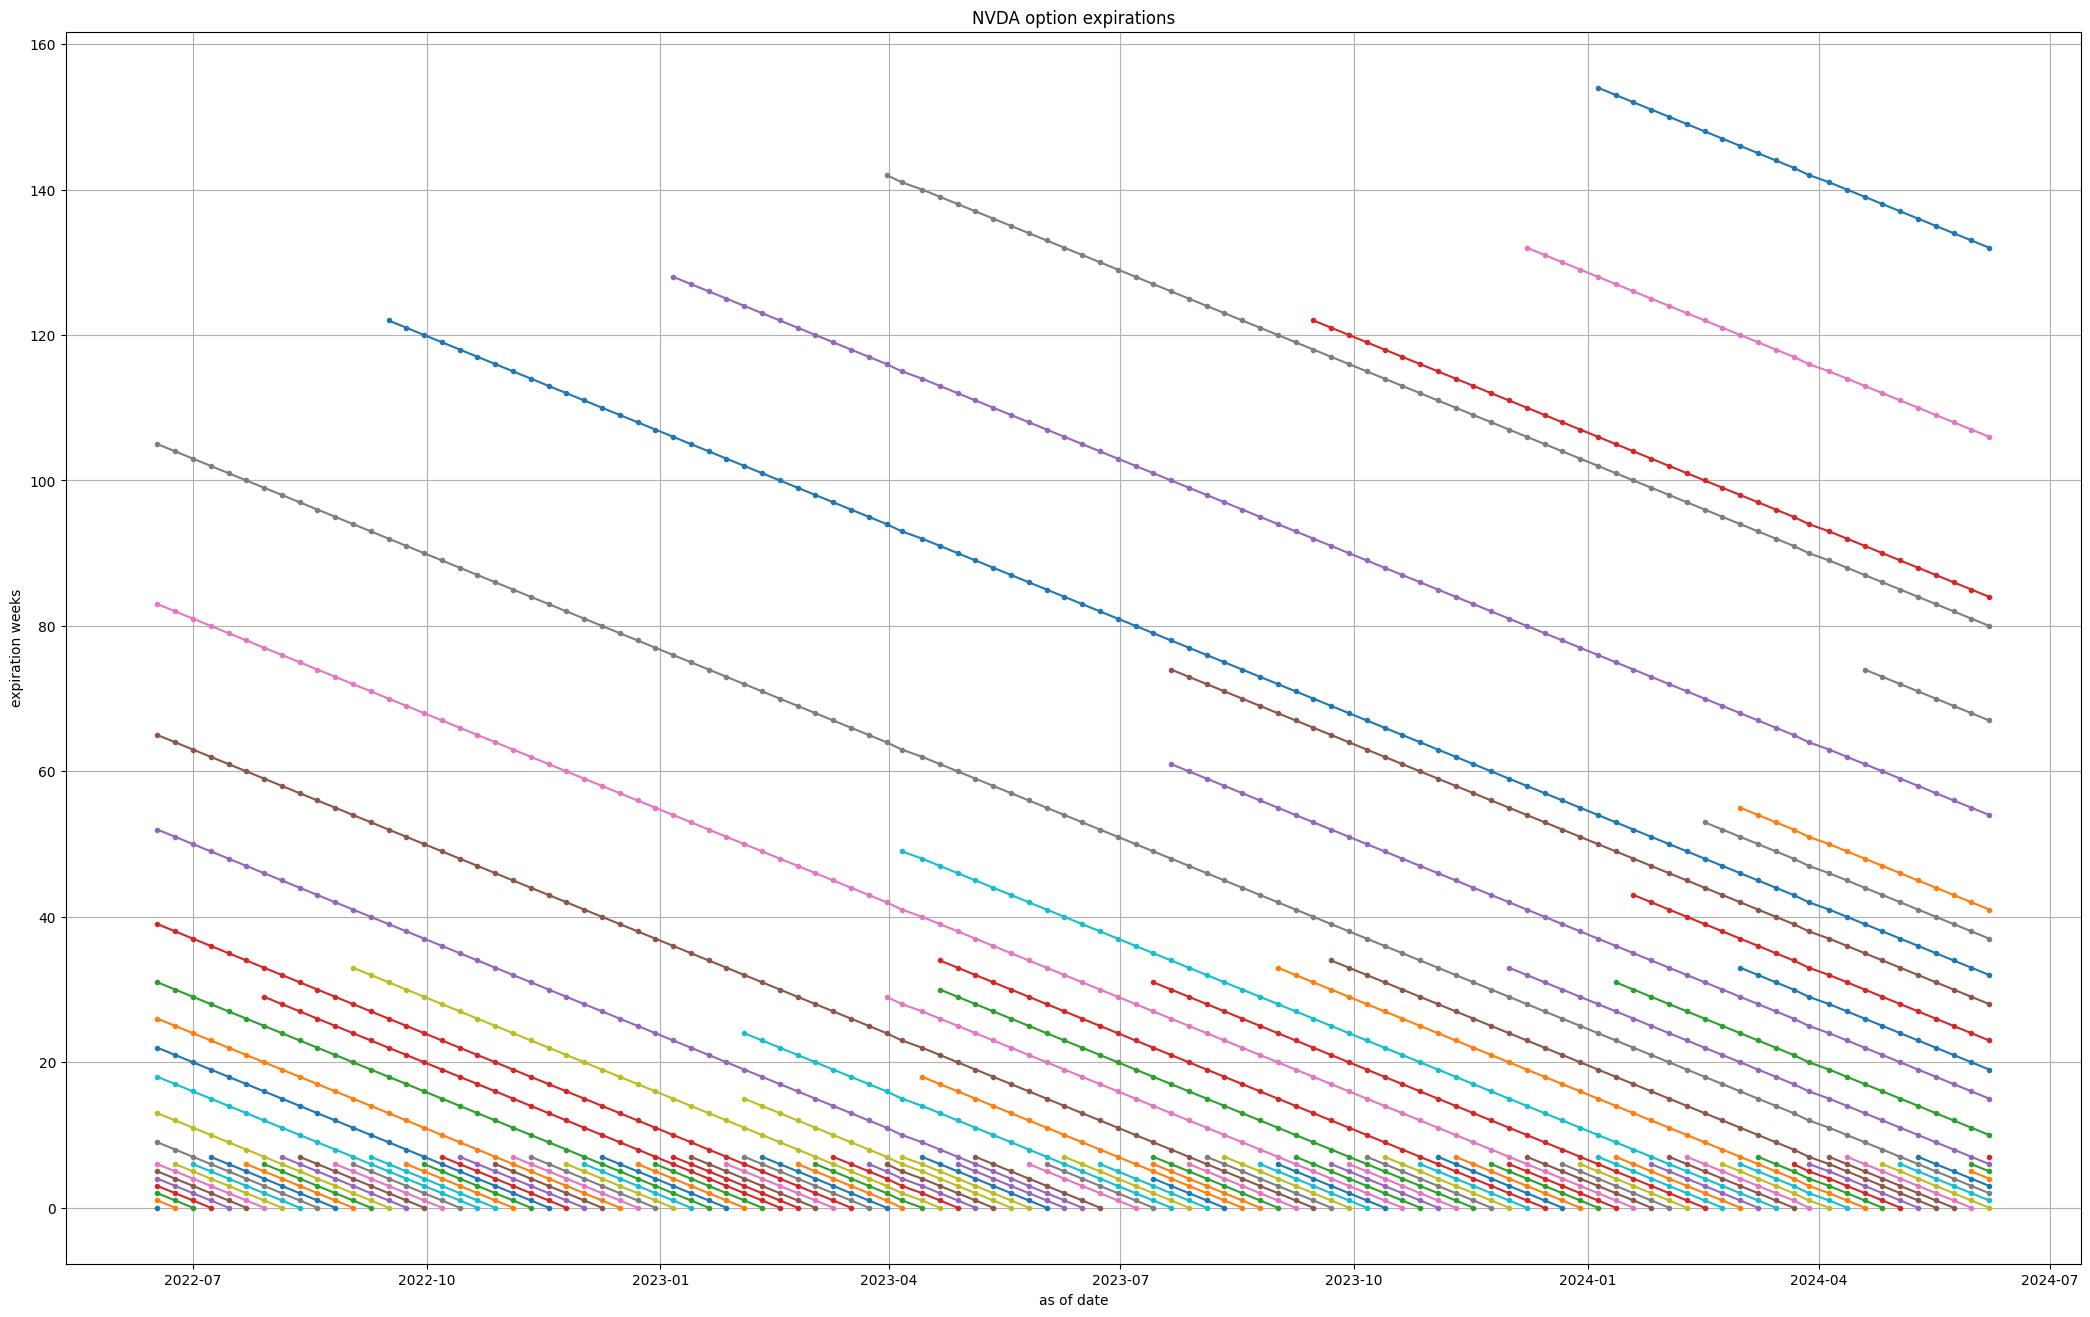

In [25]:
result = {}
for w in data['options_weekly']:
  day = w['day']
  for p in w['options']:
    exp_date = date.fromisoformat(p['contract'].expiration_date)
    # exp_weeks = round((exp_date - day.date).days / 7)
    if not exp_date in result:
      result[exp_date] = []
    result[exp_date].append(day.date)

plt.figure(figsize=(26,16))
for exp_date, dates in result.items():
  x = dates
  y = [round((exp_date - d).days / 7) for d in dates]
  plt.plot(x, y, label=exp_date, marker='.')
# plt.legend()
plt.title(symbol + ' option expirations')
plt.xlabel('as of date')
plt.ylabel('expiration weeks')
plt.grid()
plt.show()